Деревья решений и случайные леса

Деревья решений
Деревья решений — интуитивно понятные способы классификации или маркирования объектов. По сути, все сводится к классификации путем 
задания серии уточняющих вопросов. 
Бинарное разбиение позволяет эффективно спроектировать дерево, так как каждый вопрос уменьшает количество вариантов приблизительно вдвое, 
быстро сужая возможные варианты даже при большом количестве классов. 
В связанных с машинным обучением реализациях деревьев принятия решений вопросы обычно имеют вид выровненных по осям координат разбиений данных, то есть каждый узел дерева разбивает данные на две группы с помощью порогового значения одного из признаков.

Рассмотрим следующие двумерные данные с четырьмя возможными метками классов 

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

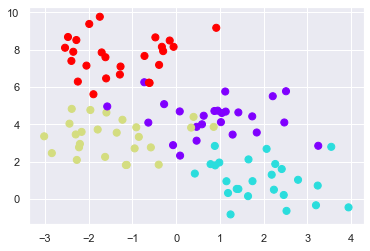

In [11]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')


Простое дерево принятия решений для этих данных будет многократно разделять данные по одной или нескольким осям, в соответствии с определенным количественным критерием, и на каждом уровне маркировать новую область согласно большинству лежащих в ней точек. 
Процесс обучения дерева принятия решений на наших данных можно выполнить в Scikit-Learn с помощью оценивателя DecisionTreeClassifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

Функция, облегчающая визуализацию вывода классификатора

In [13]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
 ax = ax or plt.gca()
 # Рисуем обучающие точки
 ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3) 
 ax.axis('tight')
 ax.axis('off')
 xlim = ax.get_xlim()
 ylim = ax.get_ylim()
 # Обучаем оцениватель
 model.fit(X, y)
 xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
 Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
 # Создаем цветной график с результатами
 n_classes = len(np.unique(y))
 contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, clim=(y.min(), y.max()), zorder=1)
 ax.set(xlim=xlim, ylim=ylim)

Визуализируем результаты классификации на основе дерева принятия решений из примера

C:\Users\Kseniya\AppData\Local\Temp\ipykernel_15752\888846089.py:15: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, clim=(y.min(), y.max()), zorder=1)


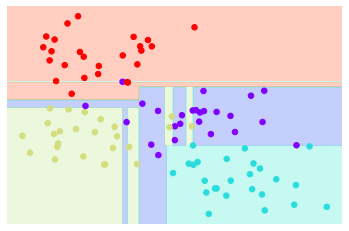

In [14]:
visualize_classifier(DecisionTreeClassifier(), X, y)

Обратите внимание, что по мере возрастания глубины мы получаем области классификации очень странной формы. Например, между желтой 
и синей областями появляется узкая и вытянутая в высоту фиолетовая область. 
Это результат того, что дерево принятия решений переобучено.

Подобное переобучение присуще всем деревьям принятия решений.


Ансамбли оценивателей: случайные леса

Случайные леса — пример одного из методов ансамблей (ensemble), основанных на агрегировании результатов ансамбля более простых оценивателей. 
Идея комбинации нескольких переобученных оценивателей для снижения эффекта этого переобучения лежит в основе метода ансамблей под названием «баггинг» (bagging). 

Баггинг использует ансамбль параллельно работающих переобучаемых оценивателей и усредняет результаты для получения оптимальной классификации. Ансамбль случайных деревьев принятия решений называется случайным лесом (random forest).

Выполнить подобную баггинг-классификацию можно вручную с помощью метода оценивателя BaggingClassifier из библиотеки Scikit-Learn

C:\Users\Kseniya\AppData\Local\Temp\ipykernel_15752\888846089.py:15: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, clim=(y.min(), y.max()), zorder=1)


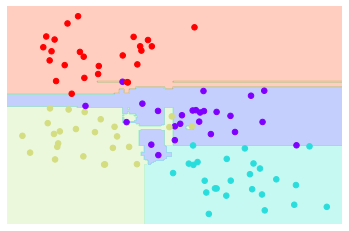

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(X, y)
visualize_classifier(bag, X, y)

На практике для рандомизации деревьев принятия решений обеспечивается определенная стохастичность процесса выбора разбиений.
При этом в обучении участвуют все данные, но результаты обучения все равно сохраняют требуемую случайность.
В библиотеке Scikit-Learn подобный оптимизированный ансамбль случайных деревьев принятия решений, автоматически выполняющий всю рандомизацию, реализован в оценивателе RandomForestClassifier. 
Все, что остается сделать, — выбрать количество оценивателей и он очень быстро (при необходимости параллельно) обучит ансамбль деревьев. 
Подробнее о настройках параметров https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

C:\Users\Kseniya\AppData\Local\Temp\ipykernel_15752\888846089.py:15: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, clim=(y.min(), y.max()), zorder=1)


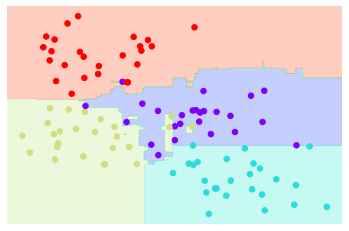

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)